In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240228.csv", low_memory=False)

df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [3]:
df.tail()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
242097,Table1a,2023,3,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,254.82,DL,0.7153,262.92,AA,0.2615,229.23,NaN,NaN,202331541212953TYSLGA
242098,Table1a,2023,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,127.59,G4,0.8767,93.08,G4,0.8767,93.08,NaN,NaN,202331541211697TYSFLL
242099,Table1a,2023,3,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,322.66,AA,0.6823,305.03,AA,0.6823,305.03,NaN,NaN,202331541213303TYSMIA
242100,Table1a,2023,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,81.97,G4,1.0000,81.97,G4,1.0000,81.97,NaN,NaN,202331541214112TYSPIE
242101,Table1a,2023,3,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,...,337.39,DL,0.5726,347.02,AA,0.3984,321.32,NaN,NaN,202331541215304TYSTPA


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242102 entries, 0 to 242101
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             242102 non-null  object 
 1   Year            242102 non-null  int64  
 2   quarter         242102 non-null  int64  
 3   citymarketid_1  242102 non-null  int64  
 4   citymarketid_2  242102 non-null  int64  
 5   city1           242102 non-null  object 
 6   city2           242102 non-null  object 
 7   airportid_1     242102 non-null  int64  
 8   airportid_2     242102 non-null  int64  
 9   airport_1       242102 non-null  object 
 10  airport_2       242102 non-null  object 
 11  nsmiles         242102 non-null  int64  
 12  passengers      242102 non-null  int64  
 13  fare            242102 non-null  float64
 14  carrier_lg      240571 non-null  object 
 15  large_ms        240571 non-null  float64
 16  fare_lg         240571 non-null  float64
 17  carrier_lo

In [5]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,242102.000000,242102.000000,242102.000000,242102.000000,242102.000000,242102.000000,242102.000000,242102.000000,242102.000000,240571.000000,240571.000000,240499.000000,240499.000000
mean,2008.285875,2.478554,31556.582383,32180.008616,12437.429906,13250.791646,1189.878072,297.803876,218.402969,0.664479,218.124915,0.449406,190.334061
std,8.563099,1.115093,1089.581733,1232.009458,1431.919247,1425.914201,703.428202,509.442821,82.268142,0.224669,84.501425,0.332381,73.428352
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.090000,0.480000,160.960000,0.155800,139.905000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,112.000000,208.710000,0.650000,207.350000,0.360000,181.230000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,337.000000,262.250000,0.870000,262.940000,0.750000,229.570000
max,2023.000000,4.000000,35412.000000,35412.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [6]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing values count per column:")
print(missing_values)

# Print the total number of rows in the DataFrame
total_rows = len(df)
print("\nTotal number of rows:", total_rows)


Missing values count per column:
tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1531
large_ms           1531
fare_lg            1531
carrier_low        1603
lf_ms              1603
fare_low           1603
Geocoded_City1    35353
Geocoded_City2    35353
tbl1apk               0
dtype: int64

Total number of rows: 242102


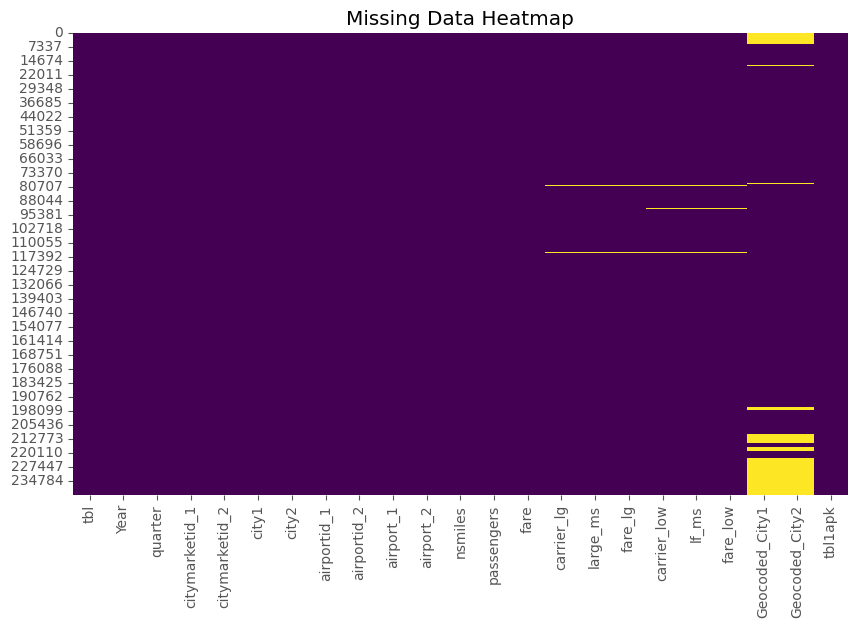

In [7]:
# Generate heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

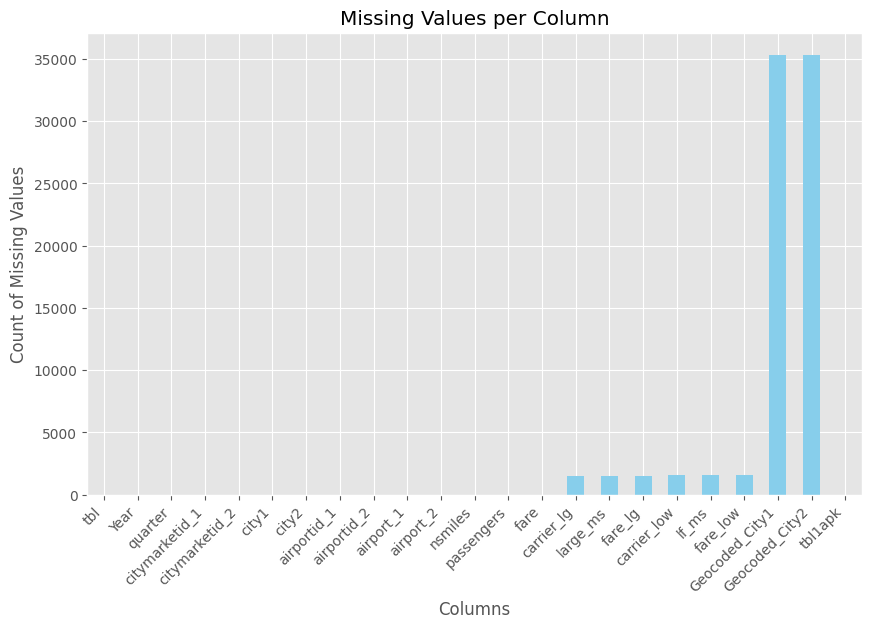

In [8]:
# Calculate the count of missing values for each column
missing_values_count = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
df.drop(columns=['Geocoded_City1', 'Geocoded_City2'], inplace=True)
df.dropna(subset=['carrier_lg','carrier_low'], inplace=True)


In [10]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,202131014014107ABQPHX


In [11]:
# Checking if there is any values that is missing: 
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
tbl               0
Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
city1             0
city2             0
airportid_1       0
airportid_2       0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg        0
large_ms          0
fare_lg           0
carrier_low       0
lf_ms             0
fare_low          0
tbl1apk           0
dtype: int64


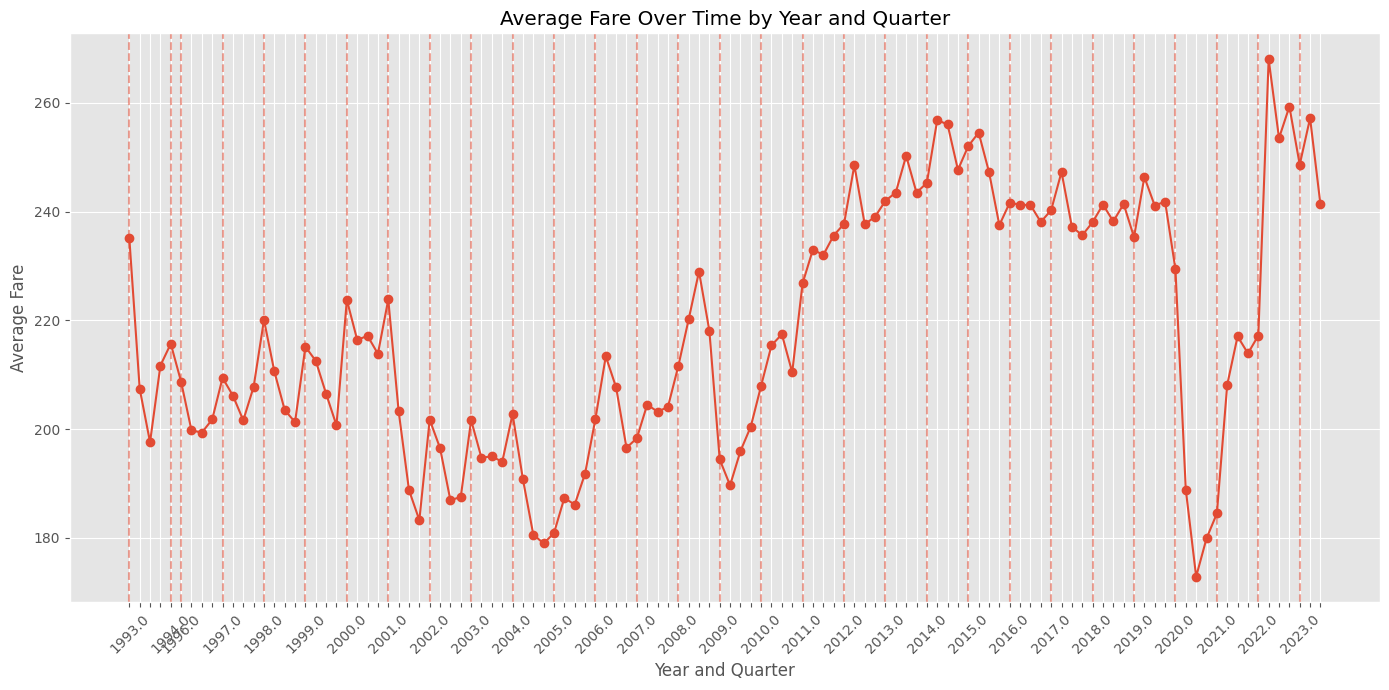

In [12]:
# x label
afbq = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()
x_labels = afbq.apply(lambda x: str(x['Year']) if x['quarter'] == 1 else '', axis=1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(afbq['Year'].astype(str) + 'Q' + afbq['quarter'].astype(str), afbq['fare'], marker='o', linestyle='-')
plt.title('Average Fare Over Time by Year and Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Average Fare')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, fontsize=10)

#lines for Q1 of each year
for year in afbq['Year'].unique():
    plt.axvline(x=str(year) + 'Q1', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

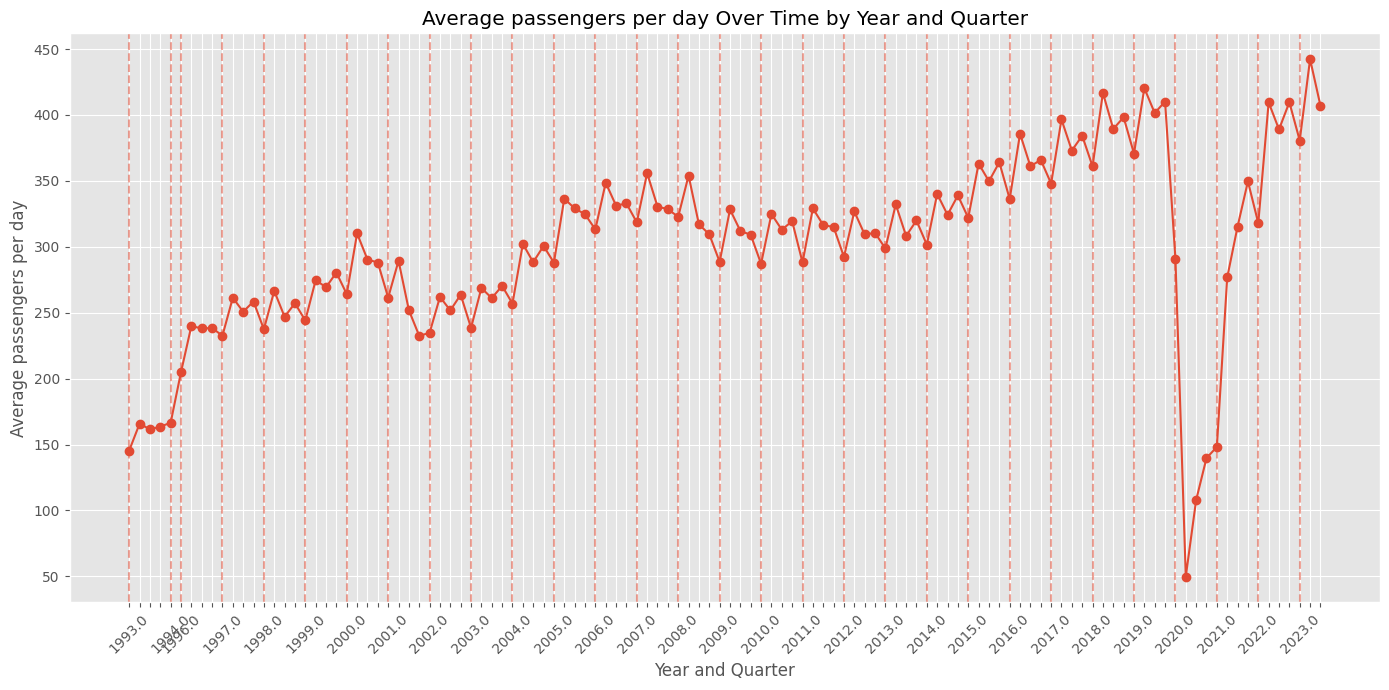

In [13]:
apbq = df.groupby(['Year','quarter'])['passengers'].mean().reset_index()
x_labels = apbq.apply(lambda x: str(x['Year']) if x['quarter'] == 1 else '', axis=1)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(apbq['Year'].astype(str) + 'Q' + apbq['quarter'].astype(str), apbq['passengers'], marker='o', linestyle='-')
plt.title('Average passengers per day Over Time by Year and Quarter')
plt.xlabel('Year and Quarter')
plt.ylabel('Average passengers per day')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, fontsize=10)

#lines for Q1 of each year
for year in apbq['Year'].unique():
    plt.axvline(x=str(year) + 'Q1', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

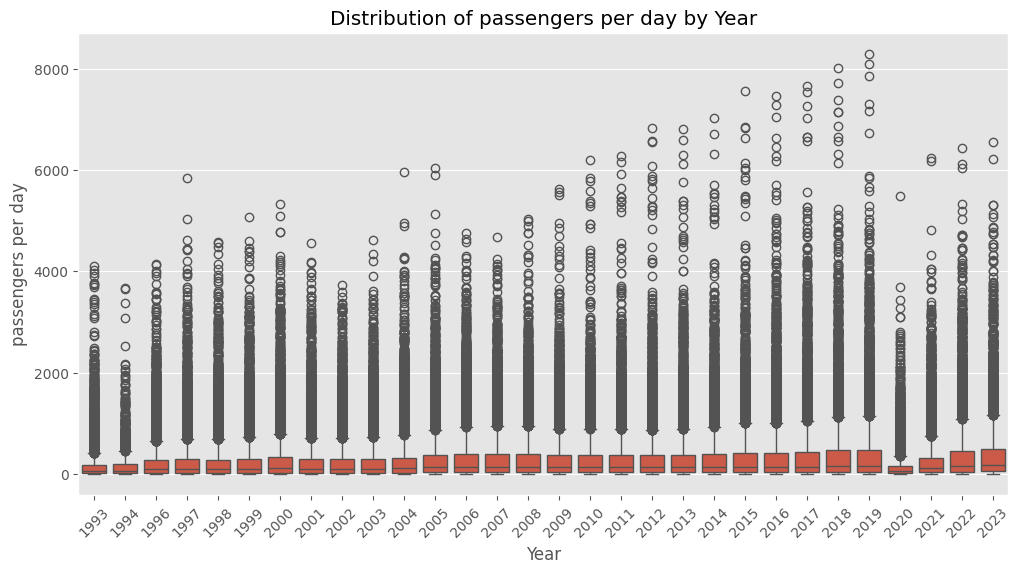

In [14]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Year', y='passengers', data=df)
plt.title('Distribution of passengers per day by Year')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('passengers per day')
plt.show()

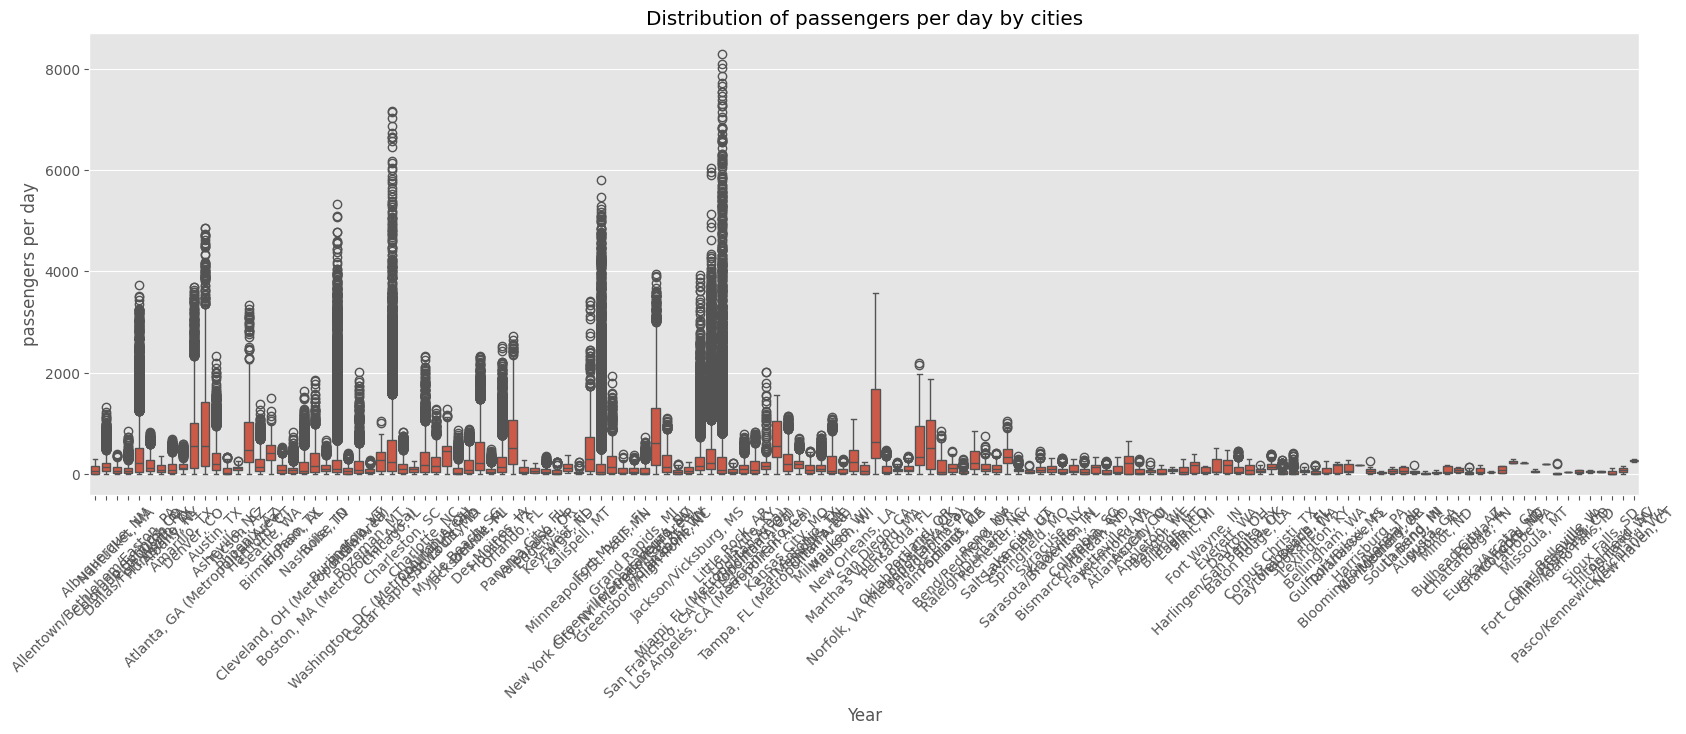

In [34]:
plt.figure(figsize=(20, 6))

sns.boxplot(x='city1', y='passengers', data=df)
plt.title('Distribution of passengers per day by cities')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('passengers per day')
plt.show()

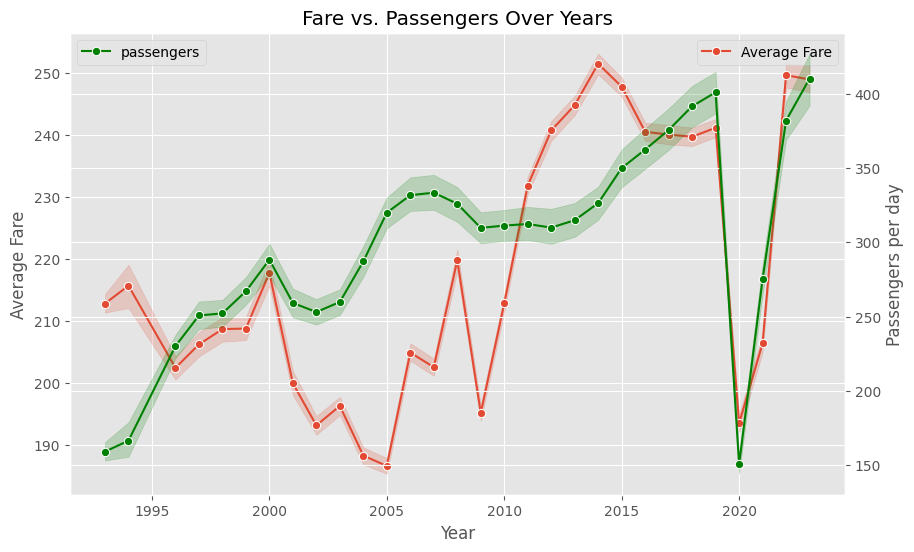

In [30]:
#First Y-axis
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='fare', data=df, marker='o', label='Average Fare')
plt.ylabel('Average Fare')

# second Y-axis
ax2 = plt.twinx()
sns.lineplot(x='Year', y='passengers', data=df, marker='o', color='g', ax=ax2, label='passengers')
ax2.set_ylabel('Passengers per day')

plt.title('Fare vs. Passengers Over Years')
plt.legend(loc='upper left')
plt.show()

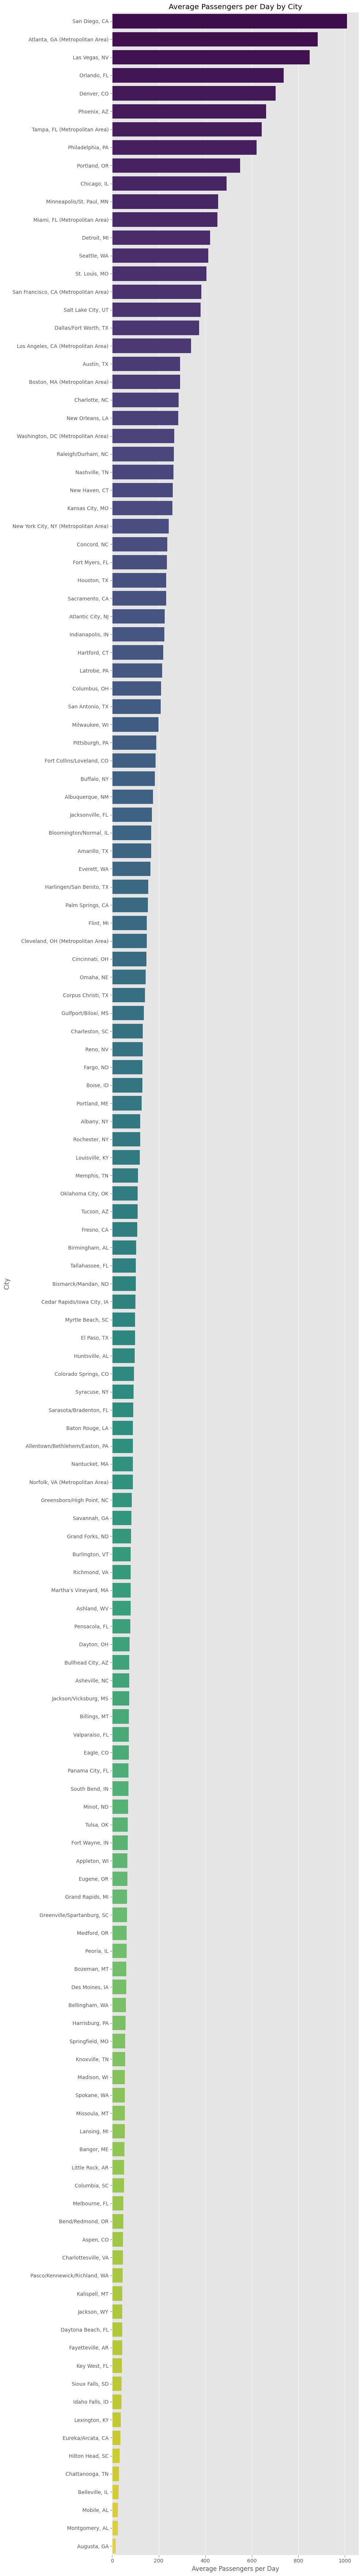

In [27]:
apbc = df.groupby('city1')['passengers'].mean().reset_index().sort_values(by='passengers', ascending=False)
plt.figure(figsize=(10, len(apbc)/2))
sns.barplot(x='passengers', y='city1', hue='city1', data=apbc, palette='viridis')

plt.xlabel('Average Passengers per Day')
plt.ylabel('City')
plt.title('Average Passengers per Day by City')
plt.tight_layout()

plt.show()

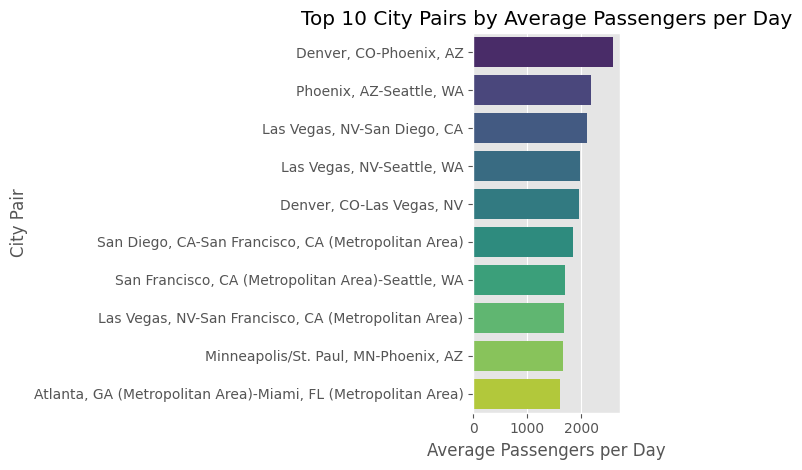

In [22]:
df['CityPair'] = df[['city1', 'city2']].agg('-'.join, axis=1)

# average passengers for each city pair
apbcp = df.groupby('CityPair')['passengers'].mean().reset_index()

# top 10 city pairs with the highest average passengers
top_city_pairs = apbcp.nlargest(10, 'passengers')

# bar chart
sns.barplot(x='passengers', y='CityPair', hue='CityPair', data=top_city_pairs, palette='viridis')

# labels
plt.xlabel('Average Passengers per Day')
plt.ylabel('City Pair')
plt.title('Top 10 City Pairs by Average Passengers per Day')
plt.tight_layout()


plt.show()

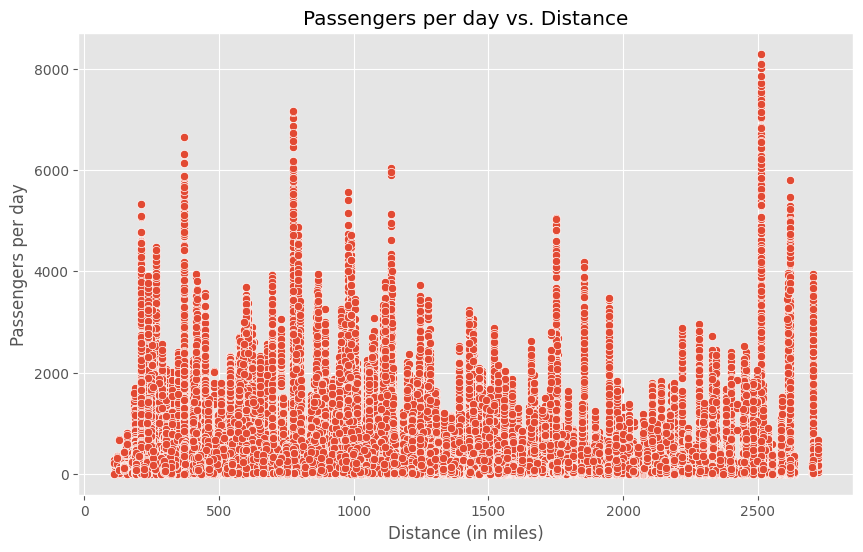

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='passengers', data=df)
plt.title('Passengers per day vs. Distance')
plt.xlabel('Distance (in miles)')
plt.ylabel('Passengers per day')
plt.show()